# Kinematic smearing

In [ ]:
#currently dataDPi - not really working properly

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pdf
import pandas as pd



In [2]:
fName = '/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/dataDPi.csv'
data = pd.read_csv(fName)
vData = data['mcdeltat'].to_numpy()
vData = vData[~np.isnan(vData)]


## Resolution function

bgc 86.12366327934411
{'mus': 0.029862663708832896, 'sigmas': 0.22609697139100698, 'fTMains': 0.6873939851529332, 'fTR': 0.564572136867183, 'cLMs': 3.3059730757047836, 'cRMs': 2.337891277051736, 'bigSigmaScale': 7.098870863430883, 'bigSigmaFrac': 0.16404032243538813, 'fTBigs': 0.6176381546503218, 'cLBs': 0.03490950004807884, 'cRBs': 0.5601593932961356}
max y 0.9925419096735741


Text(0.5, 0, 'dt [ps]')

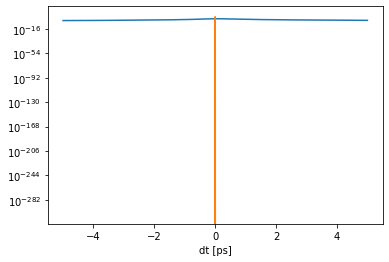

In [4]:
# Transform parameters from um to ps

beta = 276.11e-3
c = 299.792458 # um/ps
bcg = beta/(1 - beta**2)**0.5 * c
print('bgc', bgc)

'''pars = {
   'mus': 2.5998222326911318 / bgc,
   'sigmas': 19.488840799952847 / bgc,
   'fTMains': 0.6879121782503139,
   'fTR': 0.5672982488332009,
   'cLMs': 0.03847980216578396 * bgc,
   'cRMs': 0.02771982014064649 * bgc,
   'bigSigmaScale': 6.947680846616044,
   'bigSigmaFrac': 0*0.16756917570490554,
   'fTBigs': 0.6268934047143494,
   'cLBs': 0.0003812636576085269 * bgc,
   'cRBs': 0.006550526360797996 * bgc
}'''


pars = {'mus': 2.5718819938838138 /bcg , 'sigmas': 19.472299432558586 /bcg,
'fTMains': 0.6873939851529332, 'fTR': 0.564572136867183, 
'cLMs': 0.03838634992779839 * bcg, 'cRMs': 0.02714574819546088 * bcg,
'bigSigmaScale': 7.098870863430883, 'bigSigmaFrac': 0.16404032243538813,
'fTBigs': 0.6176381546503218, 'cLBs': 0.00040534156024981267 *bcg, 
'cRBs': 0.006504128737293089 *bcg}

print(pars)

# Dummy parameters for no resolution smearing
pars0 = pars.copy()
pars0["mus"] = 0
pars0["sigmas"] = 0.0001
pars0["fTMains"] = 0
pars0["bigSigmaFrac"] = 0



xLim = 5
x = np.linspace(-xLim, xLim, 35000)
y = np.vectorize(lambda t : pdf.resFun(t, pars))(x)
y0 = np.vectorize(lambda t : pdf.resFun(t, pars0))(x)
#MC histogram
hMC = np.histogram((vData), bins=(x))
xH = (hMC[1][1:] + hMC[1][:-1]) / 2
xSize = (xH[1:] - xH[:-1]) / 2

print('max y', np.quantile(y, q=1))

plt.plot(x, y)
plt.plot(x, y0)
plt.yscale("log")
plt.xlabel("dt [ps]")

## B Decays

Plot of the B-decay time for various thetaCMS, looks like huge differences

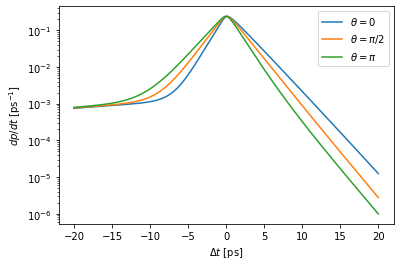

In [5]:
x    = np.linspace(-4*xLim, 4*xLim, 1500)
tau = 1.520
y0   = np.vectorize(lambda t : pdf.funDecayTheta(t, pars, tau=tau, theta=0))(x)
yOrt = np.vectorize(lambda t : pdf.funDecayTheta(t, pars, tau=tau, theta=np.pi/2))(x)
y1   = np.vectorize(lambda t : pdf.funDecayTheta(t, pars, tau=tau, theta=np.pi))(x)
#yOrtR= np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, np.pi/2))(x)

plt.plot(x, y0,   label=r'$\theta=0$')
plt.plot(x, yOrt, label=r'$\theta=\pi/2$')
plt.plot(x, y1,   label=r'$\theta=\pi$')
plt.ylabel('$dp/dt$ [ps$^{-1}$]')
plt.xlabel(r'$\Delta t$ [ps]')
plt.legend()
plt.yscale("log")

Plot the comparizon of the theta-integrated scenario and the case with no kin-smearing effect

Text(0, 0.5, 'ratio')

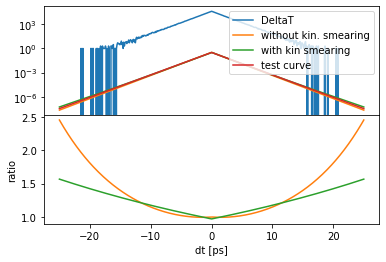

In [9]:
xLim = 25
x = np.linspace(-xLim, xLim, 500)

#MC histogram
hMC = np.histogram((vData), bins=(x))
xH = (hMC[1][1:] + hMC[1][:-1]) / 2
xSize = (xH[1:] - xH[:-1]) / 2



yOrt  = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=tau, theta=np.pi/2))(x)
yTest = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=1.03*tau, theta=np.pi/2))(x)
ySm   = np.vectorize(lambda t : pdf.funDecay(t, pars0, tau=tau))(x)
plt.subplots_adjust(hspace=0)
ax = plt.subplot(211)

plt.plot(xH, hMC[0], label="DeltaT")
plt.plot(x, yOrt, label='without kin. smearing')
plt.plot(x, ySm, label='with kin smearing')
plt.plot(x, yTest, label='test curve')
plt.yscale("log")
#plt.xlabel("dt [ps]")
plt.legend()
plt.subplot(212, sharex=ax)
plt.plot(x, ySm / yOrt, color='C1')
plt.plot(x, yTest / yOrt, color='C2')
plt.xlabel("dt [ps]")
plt.ylabel("ratio")

## B Oscilations

Let's first check the behaviour of the functions.

Notice that the real part is cosine and imaginery sine

In [6]:
#Checking the value at dt = 0 (should be equal)
print(pdf.funDecay(0, pars0), pdf.funOsc(0, pars0).real)

import scipy.integrate

#Checking the integrals

dm = 0.510
C = 1 + tau**2 * dm**2

print(scipy.integrate.quad(lambda t: C*pdf.funOscTheta(t, pars0, tau=tau, dm=dm, theta=np.pi/2).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOscTheta(t, pars, tau=tau, dm=dm, theta=np.pi/2).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOsc(t, pars0, tau=tau, dm=dm).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOsc(t, pars,  tau=tau, dm=dm).real, -40, 40))

/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))


0.3289299254648897 0.3269483225350676


/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))
/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: RuntimeWarning: overflow encountered in exp
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))
/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: RuntimeWarning: invalid value encountered in multiply
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))


(1.0000000034674392, 1.008167690983425e-08)


/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if sys.path[0] == '':


(nan, nan)
(1.0000000034763654, 1.2497163305444688e-08)
(nan, nan)


/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


Composing the full function

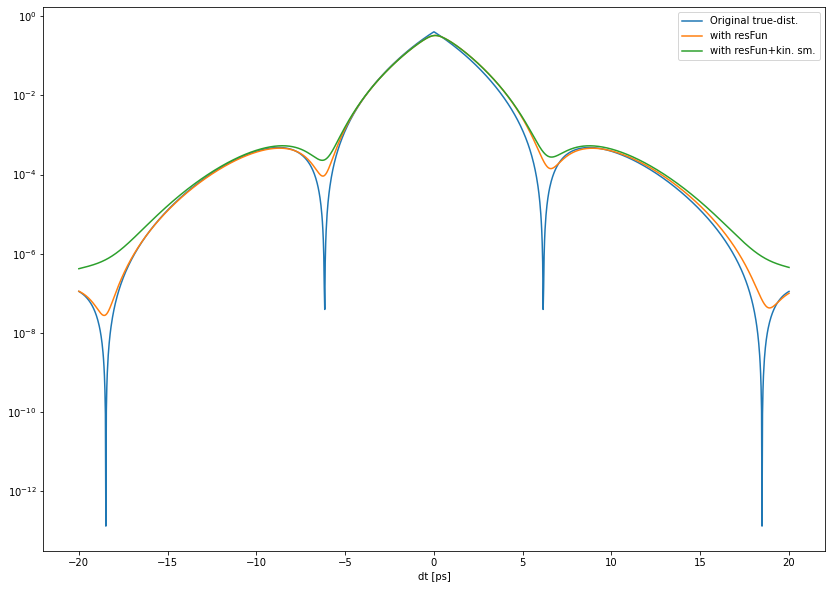

Normalizations: 0.9999831364635053 0.9999989566768422 0.999997745154949


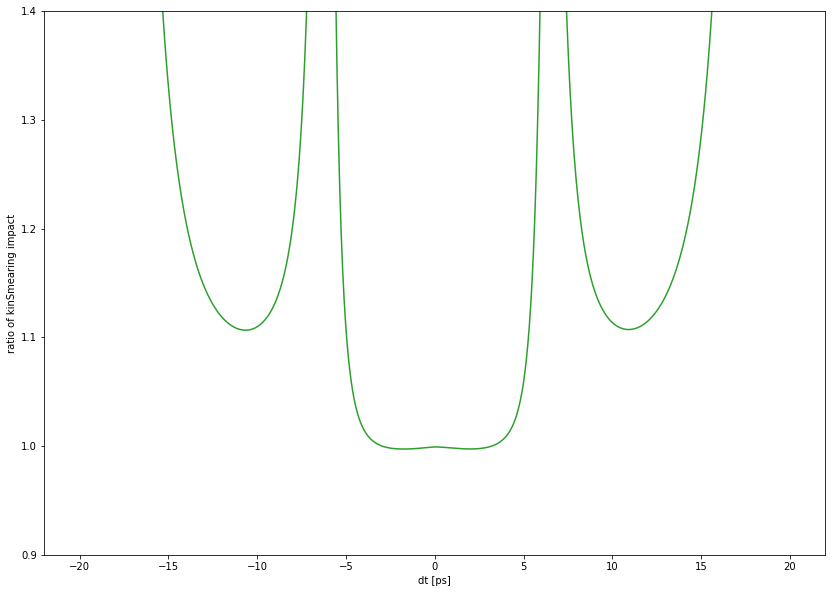

In [10]:
# exp(-|dt|/tau) * (1 + cos dm t)
def fullPDFnoKin(t, pars):
    C = 1 + 1./(1+tau**2 * dm**2)
    return 1/C * (pdf.funDecayTheta(t, pars, tau=tau, theta=np.pi/2) + pdf.funOscTheta(t, pars, tau=tau, dm=dm, theta=np.pi/2).real)

def fullPDF(t, pars):
    C = 1 + 1./(1+tau**2 * dm**2)
    return 1/C * (pdf.funDecay(t, pars, tau=tau) + pdf.funOscTheta(t, pars, tau=tau, dm=dm).real)


yOrt0 = np.vectorize(lambda t : fullPDFnoKin(t, pars0) )(x)
yOrt  = np.vectorize(lambda t : fullPDFnoKin(t, pars) )(x)
ySm   = np.vectorize(lambda t : fullPDF(t, pars) )(x)
plt.plot(x, yOrt0, label='Original true-dist.')
plt.plot(x, yOrt, label='with resFun')
plt.plot(x, ySm, label='with resFun+kin. sm.')
plt.yscale("log")
plt.xlabel("dt [ps]")
plt.legend()
plt.savefig('mixing.pdf')
plt.show()


# Impact of the kinematic term

plt.plot(x, ySm/yOrt, color='C2')
plt.xlabel("dt [ps]")
plt.ylabel("ratio of kinSmearing impact")
plt.ylim(0.9, 1.4)

# Check normalization
print('Normalizations:', np.sum(yOrt0)*(x[1]-x[0]), np.sum(yOrt)*(x[1]-x[0]), np.sum(ySm)*(x[1]-x[0]))


Plot with approximate cumulative statistic, assuming 1 bilion B-B pairs and BR=1e-4

Text(0, 0.5, 'Cumulative nunber of events')

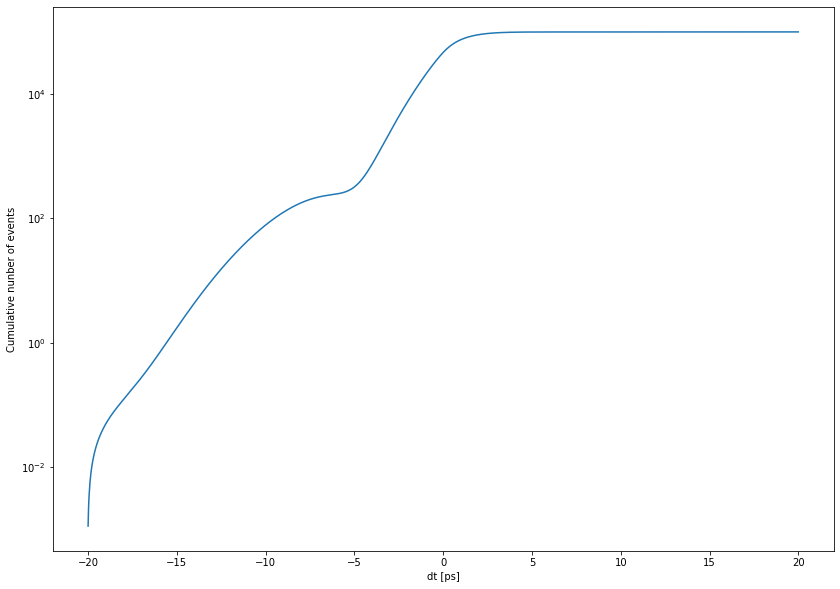

In [7]:
plt.plot(x, np.cumsum(ySm)/ np.cumsum(ySm)[-1] * 1e9 * 1e-4 )
plt.yscale("log")
plt.xlabel("dt [ps]")
plt.ylabel("Cumulative nunber of events")